Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.5000
petal width (cm): 0.5000


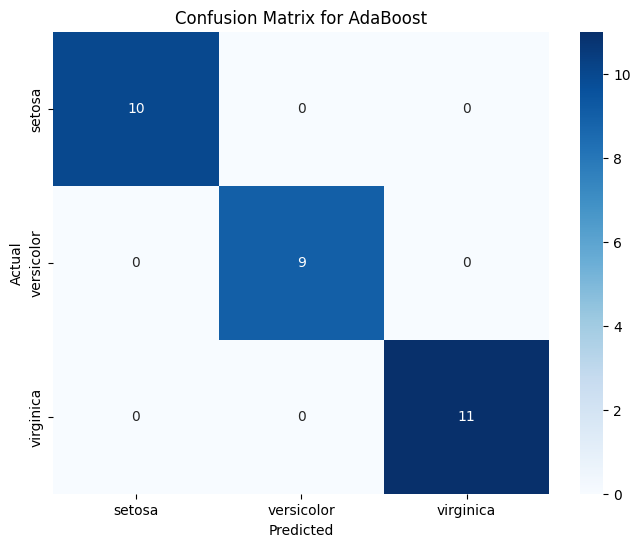

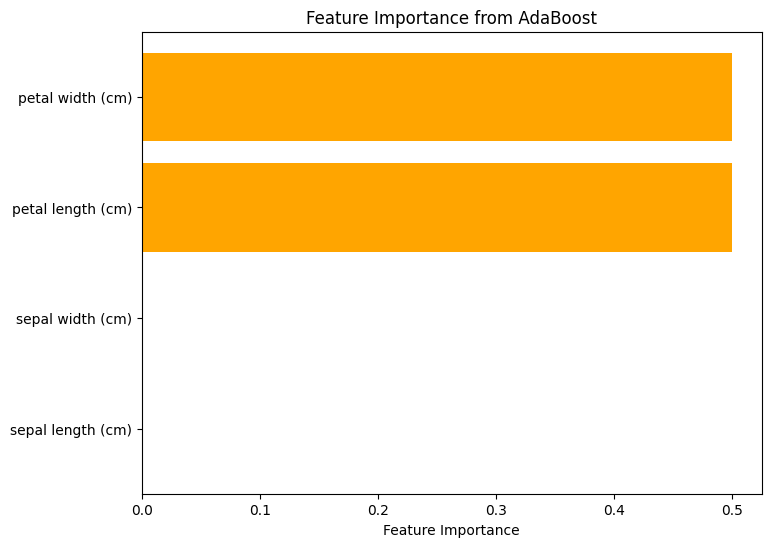

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data 
y = iris.target  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(cr)

feature_importances = ada_boost.feature_importances_

print("\nFeature Importances:")
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {feature_importances[i]:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances, color='orange')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from AdaBoost')
plt.show()